In [1]:
# import scikit-allel
import allel
# check which version is installed
print(allel.__version__)

1.2.1


In [3]:
callset = allel.read_vcf('sel4.chr22.phase3_shapegenotypes.vcf.gz.recode.vcf.gz')

In [5]:
sorted(callset.keys())

[u'calldata/GT',
 'samples',
 u'variants/ALT',
 'variants/CHROM',
 u'variants/FILTER_PASS',
 u'variants/ID',
 'variants/POS',
 u'variants/QUAL',
 'variants/REF']

In [6]:
callset['samples']

array([u'HG00096', u'HG00097', u'HG00099', u'HG00100', u'HG00171',
       u'HG00173', u'HG00174', u'HG00176', u'HG00403', u'HG00404',
       u'HG00406', u'HG00407', u'HG00551', u'HG00553', u'HG00554',
       u'HG00637', u'HG00759', u'HG00766', u'HG00844', u'HG00851',
       u'HG01112', u'HG01113', u'HG01119', u'HG01121', u'HG01500',
       u'HG01501', u'HG01503', u'HG01504', u'HG01565', u'HG01566',
       u'HG01571', u'HG01572', u'HG01583', u'HG01586', u'HG01589',
       u'HG01593', u'HG01595', u'HG01596', u'HG01597', u'HG01598',
       u'HG01879', u'HG01880', u'HG01882', u'HG01883', u'HG02461',
       u'HG02462', u'HG02464', u'HG02465', u'HG02922', u'HG02923',
       u'HG02938', u'HG02941', u'HG03006', u'HG03007', u'HG03009',
       u'HG03012', u'HG03052', u'HG03054', u'HG03055', u'HG03057',
       u'HG03642', u'HG03643', u'HG03644', u'HG03645', u'HG03713',
       u'HG03714', u'HG03716', u'HG03717', u'NA06984', u'NA06985',
       u'NA06986', u'NA06989', u'NA18486', u'NA18488', u'NA184

In [7]:
callset['variants/POS']

array([16050075, 16050115, 16050213, ..., 51244163, 51244205, 51244237],
      dtype=int32)

In [8]:
gt = allel.GenotypeArray(callset['calldata/GT'])
gt

<GenotypeArray shape=(1103547, 104, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [9]:
ac = gt.count_alleles()
ac

<AlleleCountsArray shape=(1103547, 9) dtype=int32>
208   0   0   0   0   0   0   0   0
207   1   0   0   0   0   0   0   0
207   1   0   0   0   0   0   0   0
...
205   3   0   0   0   0   0   0   0
208   0   0   0   0   0   0   0   0
207   1   0   0   0   0   0   0   0

In [13]:
import random
random.seed(42)
import time
import numpy as np
np.random.seed(42)
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
import bcolz
import pandas
import allel; print('scikit-allel', allel.__version__)
# %reload_ext memory_profiler

('scikit-allel', u'1.2.1')


In [14]:
gt

<GenotypeArray shape=(1103547, 104, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [15]:
ac = gt.count_alleles()[:]

In [16]:
ac

<AlleleCountsArray shape=(1103547, 9) dtype=int32>
208   0   0   0   0   0   0   0   0
207   1   0   0   0   0   0   0   0
207   1   0   0   0   0   0   0   0
...
205   3   0   0   0   0   0   0   0
208   0   0   0   0   0   0   0   0
207   1   0   0   0   0   0   0   0

In [166]:
# flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 1) # This is remove singleton
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 5) # This is for more strict MAF cutoff


gf = gt.compress(flt, axis=0)
gf

<GenotypeArray shape=(138928, 104, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 1/0 1/0 0/0 0/0 ... 1/0 0/1 0/0 0/0 0/0
0/1 0/0 0/0 0/0 1/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [167]:
gn = gf.to_n_alt()
gn

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [170]:
n = 100000  # number of SNPs to choose randomly
vidx = np.random.choice(gn.shape[0], n, replace=False)
vidx.sort()
gnr = gn.take(vidx, axis=0)
gnr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [285]:
coords1, model1 = allel.pca(gnr, n_components=10, scaler='patterson')

In [286]:
# cont labels
df_cont = pandas.read_csv('continental.txt', delimiter='\t', index_col='Population')
df_cont.head()

,Population Description,Continental,Sequence Data Available,Alignment Data Available,Variant Data Available
Population,,,,,
CHB,"Han Chinese in Beijing, China",EAS,1,1,1
JPT,"Japanese in Tokyo, Japan",EAS,1,1,1
CHS,Southern Han Chinese,EAS,1,1,1
CDX,"Chinese Dai in Xishuangbanna, China",EAS,1,1,1
KHV,"Kinh in Ho Chi Minh City, Vietnam",EAS,1,1,1


In [287]:
# pop labels
df_samples = pandas.read_csv('integrated_call_samples_v2.20130502.ALL.ped.txt', delimiter='\t', index_col='Individual ID')
df_samples = df_samples.join(df_cont, on='Population')
# df_samples.tail(10)

In [288]:
# mydf = pandas.merge(df_samples, df_samples)
df_gnu = pandas.DataFrame(data=coords1, index=callset['samples'])
#df_gnu

In [289]:
# pops = pandas.merge(df_gnu, df_samples, on=['']) 
pca_samples = df_gnu.join(df_samples)
populations = pca_samples.Population.unique()

In [290]:
continents = pca_samples.Continental.unique()
cont_colours = plt.cm.rainbow(np.linspace(0, 1, len(continents)))

In [291]:
pop_colours = plt.cm.rainbow(np.linspace(0, 1, len(populations)))

In [292]:
pca_samples.head()

,0,1,2,3,4,5,6,7,8,9,...,Other Comments,phase 3 genotypes,related genotypes,omni genotypes,affy_genotypes,Population Description,Continental,Sequence Data Available,Alignment Data Available,Variant Data Available
HG00096,-76.970691,-138.343972,-122.619659,33.626169,-17.144164,69.557486,-86.889017,42.327608,-6.062450,145.255693,...,0,1,0,1,1,British in England and Scotland,EUR,1.0,1.0,1.0
HG00097,-87.668020,-100.543715,-60.406233,68.767287,9.030656,-0.475359,12.168354,-21.472216,-14.012779,-1.505613,...,0,1,0,1,1,British in England and Scotland,EUR,1.0,1.0,1.0
HG00099,-80.300787,-117.145677,-44.578280,38.629879,-11.419253,9.729764,-10.627899,25.354443,-11.048544,30.228030,...,0,1,0,1,1,British in England and Scotland,EUR,1.0,1.0,1.0
HG00100,-73.250119,-126.444642,-82.046437,51.008274,2.664938,8.406849,-9.719281,29.523001,15.189196,-2.984656,...,0,1,0,1,1,British in England and Scotland,EUR,1.0,1.0,1.0
HG00171,-99.988904,-86.286602,-52.454931,15.498092,-4.372493,10.803016,-2.811192,-9.698666,13.697718,-15.023232,...,0,1,0,1,1,Finnish in Finland,EUR,1.0,1.0,1.0


In [293]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population, pops, pop_colors):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop,color in zip(pops, pop_colors):
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=color, 
                label=pop, markersize=6, mec='k', mew=.5)

#        ax.scatter(x[flt], y[flt]) #, s=50) color=color

    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca_cont(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = pca_samples.Continental.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population, continents, cont_colours)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population, continents, cont_colours)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()
    

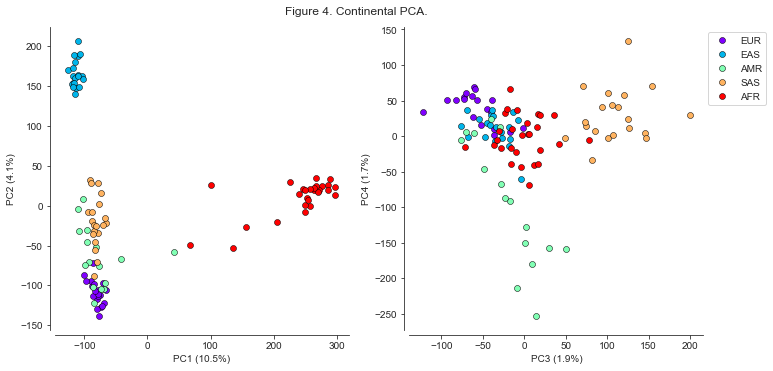

In [294]:
fig_pca_cont(coords1, model1, 'Figure 4. Continental PCA.')

In [295]:
def fig_pca_pop(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = pca_samples.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population, populations, pop_colours)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population, populations, pop_colours)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()
    

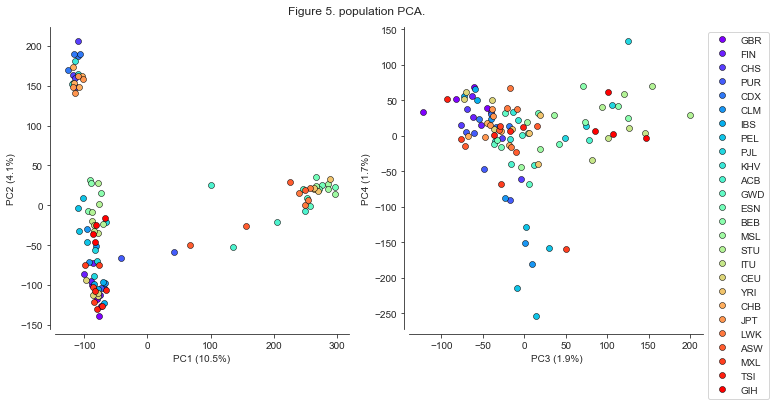

In [296]:
fig_pca_pop(coords1, model1, 'Figure 5. population PCA.')